#                             *Analysis*

- 3.1. Objectives
- 3.2. What Is Algorithm Analysis?
- 3.3. Big-O Notation
- 3.4. An Anagram Detection Example
- 3.4.1. Solution 1: Checking Off
- 3.4.2. Solution 2: Sort and Compare
- 3.4.3. Solution 3: Brute Force
- 3.4.4. Solution 4: Count and Compare
- 3.5. Performance of Python Data Structures
- 3.6. Lists
- 3.7. Dictionaries
- 3.8. Summary
- 3.9. Key Terms
- 3.10. Discussion Questions
- 3.11. Programming Exercises

---
### 3.1. Objectives
- To understand why algorithm analysis is important.
- To be able to use “Big-O” to describe execution time.
- To understand the “Big-O” execution time of common operations on Python lists and dictionaries.
- To understand how the implementation of Python data impacts algorithm analysis.
- To understand how to benchmark simple Python programs.

---
# 3.2. What Is Algorithm Analysis?

Algorithm analysis is concerned with comparing algorithms based upon the amount of computing resources that each algorithm uses.

At this point, it is important to think more about what we really mean by computing resources. There are two different ways to look at this. One way is to consider the amount of space or memory an algorithm requires to solve the problem. The amount of space required by a problem solution is typically dictated by the problem instance itself. Every so often, however, there are algorithms that have very specific space requirements, and in those cases we will be very careful to explain the variations.

As an alternative to space requirements, we can analyze and compare algorithms based on the amount of time they require to execute. This measure is sometimes referred to as the “execution time” or “running time” of the algorithm.

In [34]:
import time


def sum_of_n(n):
    start = time.time()
    the_sum = 0
    for i in range(1, n + 1):
        the_sum = the_sum + i
    end = time.time()
    return the_sum, end - start

print(sum_of_n(10))

(55, 0.0)


In [37]:
for i in range(5):
     print("Sum is %d required %10.7f seconds" % sum_of_n(1000000))

Sum is 500000500000 required  0.0350914 seconds
Sum is 500000500000 required  0.0488017 seconds
Sum is 500000500000 required  0.0468316 seconds
Sum is 500000500000 required  0.0312500 seconds
Sum is 500000500000 required  0.0469174 seconds


In [51]:
def sum_of_n_3(n):
    start = time.time()
    result = (n * (n + 1)) / 2
    end = time.time()
    return result, end -start 


print(sum_of_n_3(10))

(55.0, 0.0)


In [40]:
for i in [10000,100000,1000000,10000000,100000000]:
     print("Sum is %d required %10.7f seconds" % sum_of_n(i))

Sum is 50005000 required  0.0010002 seconds
Sum is 5000050000 required  0.0060008 seconds
Sum is 500000500000 required  0.0548244 seconds
Sum is 50000005000000 required  0.6889658 seconds
Sum is 5000000050000000 required  6.8096163 seconds


In [60]:
for i in [10000,100000,1000000,10000000,100000000]:
     print("Sum is %d required %10.7f seconds" % sum_of_n_3(i))

Sum is 50005000 required  0.0000000 seconds
Sum is 5000050000 required  0.0000000 seconds
Sum is 500000500000 required  0.0000000 seconds
Sum is 50000005000000 required  0.0000000 seconds
Sum is 5000000050000000 required  0.0000000 seconds


There are two important things to notice about this output. First, the times recorded above are shorter than any of the previous examples. Second, they are very consistent no matter what the value of n. It appears that sum_of_n_3 is hardly impacted by the number of integers being added.

We need a better way to characterize these algorithms with respect to execution time. The benchmark technique computes the actual time to execute. It does not really provide us with a useful measurement, because it is dependent on a particular machine, program, time of day, compiler, and programming language. Instead, we would like to have a characterization that is independent of the program or computer being used. This measure would then be useful for judging the algorithm alone and could be used to compare algorithms across implementations.

*En resumen podemos decir que el analisis de algoritmos Es el proceso o tecnica que nos ayuda a comparar algoritmos en función de la cantidad de recursos informáticos(tiempo y espacio en memoria) que utiliza cada uno de ellos y asi obtener el mas eficiente para resolver cierto problema*


---
# 3.3. Big-O Notation

When trying to characterize an algorithm’s efficiency in terms of execution time, independent of any particular program or computer, it is important to quantify the number of operations or steps that the algorithm will require. If each of these steps is considered to be a basic unit of computation, then the execution time for an algorithm can be expressed as the number of steps required to solve the problem. Deciding on an appropriate basic unit of computation can be a complicated problem and will depend on how the algorithm is implemented.

`A good basic unit of computation for comparing the summation algorithms shown earlier might be to count the number of assignment statements performed to compute the sum.` In the function sum_of_n, the number of assignment statements is 1 (the_sum=0) plus the value of n (the number of times we perform the_sum=the_sum+i). We can denote this by a function, call it T, where T(n)=1+n. The parameter n is often referred to as the “size of the problem,” and we can read this as “T(n) is the time it takes to solve a problem of size n, namely 1 + n steps.”

In the summation functions given above, it makes sense to use the number of terms in the summation to denote the size of the problem. `We can then say that the sum of the first 100,000 integers is a bigger instance of the summation problem than the sum of the first 1,000.` Because of this, it might seem reasonable that the time required to solve the larger case would be greater than for the smaller case. `Our goal then is to show how the algorithm’s execution time changes with respect to the size of the problem.`

Computer scientists prefer to take this analysis technique one step further. `It turns out that the exact number of operations is not as important as determining the most dominant part of the T(n) function.` In other words, as the problem gets larger, some portion of the T(n) function tends to overpower(dominar) the rest. `This dominant term is what, in the end, is used for comparison. The order of magnitude function describes the part of T(n) that increases the fastest as the value of n increases. Order of magnitude is often called Big-O notation (for “order”) and written as O(f(n)). It provides a useful approximation to the actual number of steps in the computation. The function f(n) provides a simple representation of the dominant part of the original T(n).`

In the above example, T(n)=1+n. `As n gets large, the constant 1 will become less and less significant to the final result.` If we are looking for an approximation for T(n), then we can drop the 1 and simply say that ``the running time is O(n).`` It is important to note that the 1 is certainly significant for T(n). ``However, as n gets large, our approximation will be just as accurate without it.``

As another example, suppose that for some algorithm, the exact number of steps is T(n)=5n2+27n+1005. When n is small, say 1 or 2, the constant 1005 seems to be the dominant part of the function. However, as n gets larger, the n2 term becomes the most important. In fact, when n is really large, the other two terms become insignificant in the role that they play in determining the final result. Again, to approximate T(n) as n gets large, we can ignore the other terms and focus on 5n2. In addition, the coefficient 5 becomes insignificant as n gets large. We would say then that the function T(n) has an order of magnitude f(n)=n2, or simply that it is O(n2).

A number of very common order of magnitude functions will come up over and over as you study algorithms. In order to decide which of these functions is the dominant part of any T(n) function, we must see how they compare with one another as n gets large.

---
### Common Functions for Big-O

| f(n) | Name |
| ----------- | ----------- |
| 1 | Constant |
| log __*n*__ | Logarithmic |
| __*n*__ | Linear |
| __*n*__ log __*n*__| Log Linear |
| __*n^2*__ | Quadratic |
| __*n^3*__ | Cubic |
| __2^*n*__ | Exponential |

---
### Graphs of the common functions

Notice that when n is small, the functions are not very well defined with respect to one another. It is hard to tell which is dominant. However, as n grows, there is a definite relationship and it is easy to see how they compare with one another.

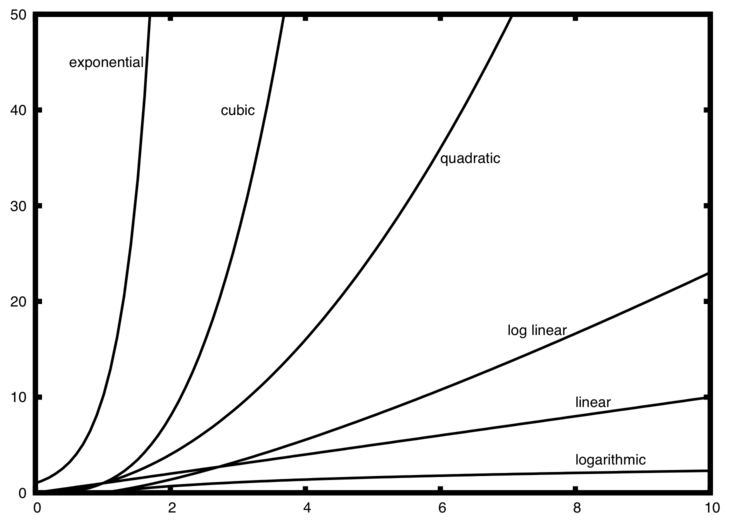

### __Another example__

```
a = 5
b = 6
c = 10
for i in range(n):
    for j in range(n):
        x = i * i
        y = j * j
        z = i * j
for k in range(n):
    w = a * k + 45
    v = b * b
d = 33
```

The number of assignment operations is the sum of four terms. The first term is the constant 3, representing the three assignment statements at the start of the fragment. The second term is 3n^2, since there are three statements that are performed n^2 times due to the nested iteration. The third term is 2n, two statements iterated n times. Finally, the fourth term is the constant 1, representing the final assignment statement. This gives us T(n)=3+3n^2+2n+1=3n^2+2n+4. By looking at the exponents, we can easily see that the n^2 term will be dominant and therefore this fragment of code is O(n^2). Note that all of the other terms as well as the coefficient on the dominant term can be ignored as n grows larger.

### Comparing T(n) with Common Big-O Functions

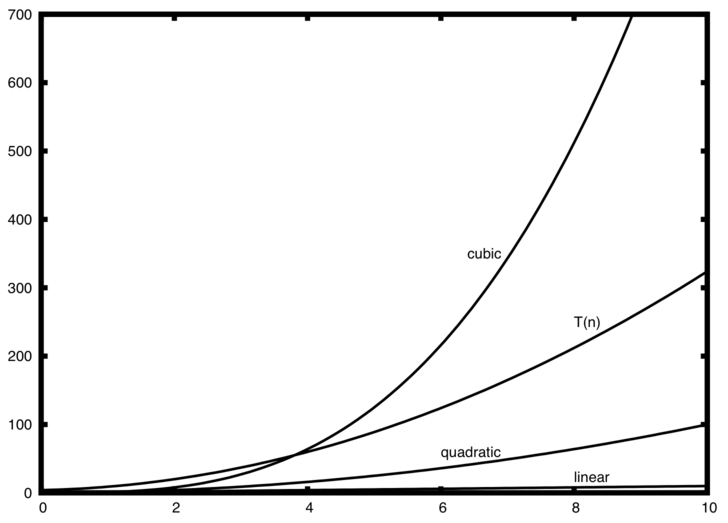

the figure above shows a few of the common Big-O functions as they compare with the T(n) function discussed above. Note that T(n) is initially larger than the cubic function. However, as n grows, the cubic function quickly overtakes T(n). It is easy to see that T(n) then follows the quadratic function as n continues to grow.